# Objetivo1 


$resize$ $imagenes$

In [80]:
import cv2
import glob
import skimage


#Librerias contornos 
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
from skimage import data, io
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import threshold_otsu 


In [61]:
#se obtiene lista de imagenes
images00000 = [cv2.imread(file,0) for file in glob.glob("Dataset_traffic_sign/00000/*.png")]
images00000_mod = [] 
for im in images00000:
    #se aplica el resize
    images00000_mod.append(cv2.resize(im, (100, 100), interpolation = cv2.INTER_NEAREST))

#se muestran las imagenes
for im in images00000_mod:
    cv2.imshow('Resized Image', im)
    print(im.shape)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


In [5]:
for im in images00000:
    print(im.shape)

(148, 144, 3)
(61, 59, 3)
(124, 122, 3)
(104, 109, 3)
(110, 107, 3)
(108, 109, 3)


Bordes 

In [23]:
rango = len(images00000)

In [33]:

for i in range(rango):
    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(images00000[i])
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(images00000[i])
    print(edges_prewitt_vertical)
    print(edges_prewitt_vertical.shape)
    print(type(edges_prewitt_vertical))
    print("---------------------")
    cv2.imshow('ventana',edges_prewitt_vertical)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.00392157  0.00130719 ...  0.01045752 -0.00261438
   0.        ]
 [ 0.          0.00130719 -0.00130719 ...  0.02222222  0.
   0.        ]
 ...
 [ 0.         -0.00130719 -0.00261438 ...  0.00915033 -0.00130719
   0.        ]
 [ 0.          0.00653595 -0.00653595 ...  0.00915033 -0.00522876
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(148, 144)
<class 'numpy.ndarray'>
---------------------
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.00261438 -0.00261438 ... -0.00915033  0.00784314
   0.        ]
 [ 0.         -0.00522876 -0.00130719 ... -0.01699346  0.02352941
   0.        ]
 ...
 [ 0.          0.8130719   0.60522876 ... -0.10588235 -0.09411765
   0.        ]
 [ 0.          0.84052288  0.55424837 ...  0.11372549 -0.05882353
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]

In [81]:
def convertirArray(imagen):
    return imagen.reshape(1,-1)

In [87]:
def mostrarImagenes(lista):
    for i in range(len(lista)):
        print(lista[i])

Distinto a metodo Otsu

In [100]:
feauturesList1  = []

for i in range(rango):
    gray = cv2.medianBlur(images00000_mod[i], 5)
    dst2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    feauturesList1.append(convertirArray(dst2))
    cv2.imshow('umbral adaptable', dst2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
mostrarImagenes(feauturesList1)

[[255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]]
[[  0   0 255 ...   0   0   0]]
[[0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]]
[[255 255   0 ...   0   0   0]]


Otsu

In [62]:
import skimage
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

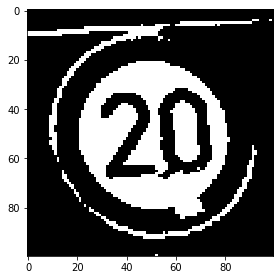

----------------------------------------------


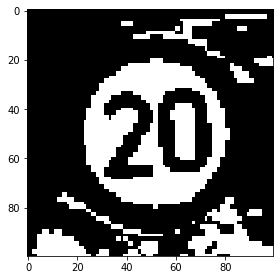

----------------------------------------------


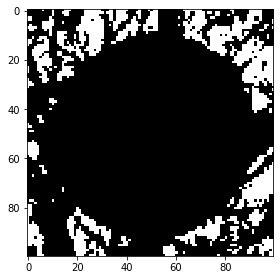

----------------------------------------------


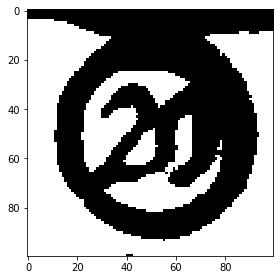

----------------------------------------------


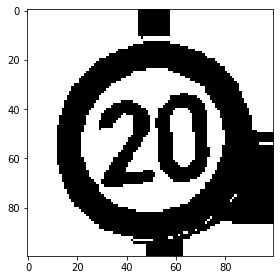

----------------------------------------------


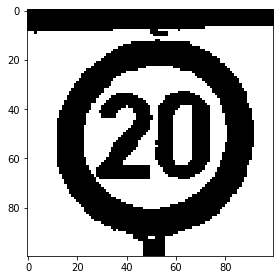

----------------------------------------------


In [93]:
feauturesList2  = []


for i in range(rango):    
    threshold_value = threshold_otsu(images00000_mod[i])  

    camera_threholded = images00000_mod[i] > threshold_value  

    # Show the original image
    #io.imshow(images00000_mod[i])
    #plt.show()

    # Show the thresholded image
    io.imshow(camera_threholded)
    plt.show()
    
    feauturesList2.append(convertirArray(camera_threholded*255))
    
    print("----------------------------------------------")

In [94]:
mostrarImagenes(feauturesList2)

[[0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0 255 255]]
[[  0   0   0 ... 255 255 255]]
[[255 255 255 ... 255 255 255]]
[[  0   0   0 ... 255 255 255]]


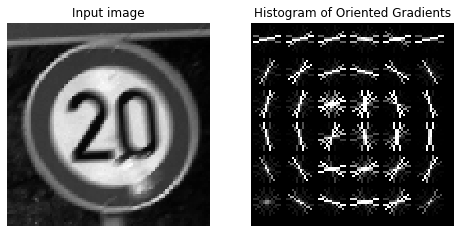

In [99]:
from skimage.feature import hog
from skimage import data, exposure


fd, hog_image = hog(images00000_mod[0], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images00000_mod[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
from cv2 import 

In [121]:
from sklearn import svm

sd = cv2.FeatureDetector_create("SURF")
keypoints = sd.detect(hog_image_rescaled.flatten())
kp,des = surf.compute(hog_image_rescaled.flatten(), keypoints)
model = svm.SVC()
model.fit(des,['type1'])

AttributeError: module 'cv2' has no attribute 'FeatureDetector_create'